In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from os import listdir, path, makedirs
from os.path import isfile, join

import shutil


In [2]:
imagem_face_1 =cv.imread("imagens/cropped_faces/s01_01.jpg")
imagem_face_1 = cv.cvtColor(imagem_face_1, cv.COLOR_BGR2RGB)

imagem_face_2 =cv.imread("imagens/cropped_faces/s02_01.jpg")
imagem_face_2 = cv.cvtColor(imagem_face_2, cv.COLOR_BGR2RGB)

imagem_face_3 =cv.imread("imagens/cropped_faces/s03_01.jpg")
imagem_face_3 = cv.cvtColor(imagem_face_3, cv.COLOR_BGR2RGB)

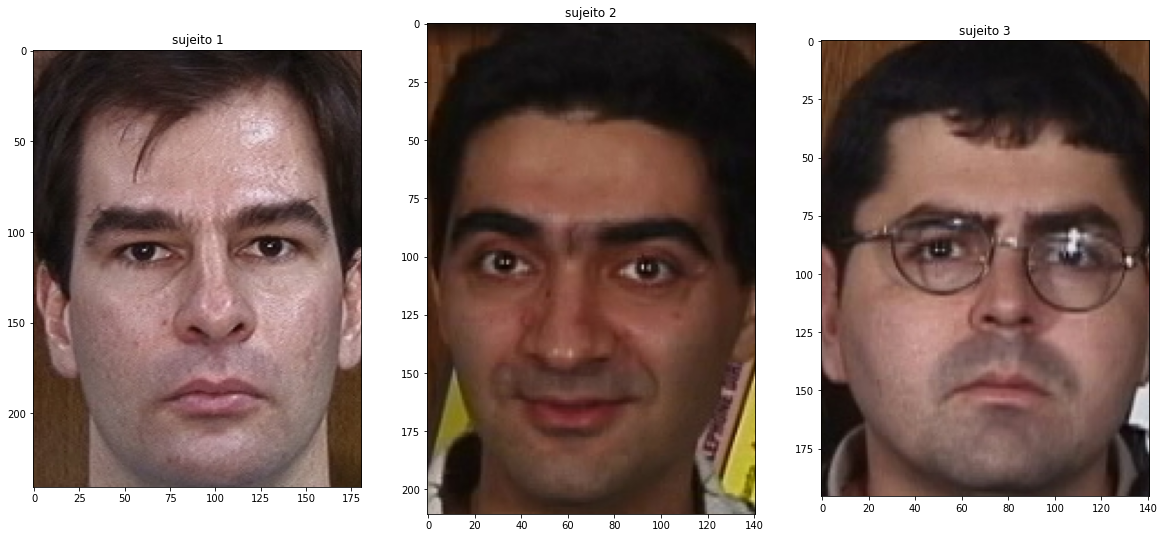

In [3]:
plt.figure(figsize=(20,10))
plt.subplot(131)
plt.title("sujeito 1")
plt.imshow(imagem_face_1)
plt.subplot(132)
plt.title("sujeito 2")
plt.imshow(imagem_face_2)
plt.subplot(133)
plt.title("sujeito 3")
plt.imshow(imagem_face_3)

In [4]:
imagem_face_1.shape

(241, 181, 3)

In [5]:
imagem_face_2.shape

(211, 141, 3)

In [6]:
imagem_face_3.shape

(196, 141, 3)

In [7]:
faces_caminho = "imagens/cropped_faces/"
lista_arq_faces = [f for f in listdir(
    faces_caminho) if isfile(join(faces_caminho, f))]


In [8]:

lista_arq_faces[0]


's01_01.jpg'

In [9]:
len(lista_arq_faces)


750

In [10]:
faces_path_treino = "imagens/treino/"
faces_path_teste = "imagens/teste/"

if not path.exists(faces_path_treino):
    makedirs(faces_path_treino)

if not path.exists(faces_path_teste):
    makedirs(faces_path_teste)

for arq in lista_arq_faces:
    sujeito = arq[1:3]
    numero = arq[4:6]

    if int(numero) <= 10:
        shutil.copyfile(faces_caminho + arq, faces_path_treino + arq)
    else:
        shutil.copyfile(faces_caminho + arq, faces_path_teste + arq)


In [11]:
def padronizar_imagem(imagem_caminho):
    imagem = cv.imread(imagem_caminho, cv.IMREAD_GRAYSCALE)
    imagem = cv.resize(imagem, (200, 200), interpolation=cv.INTER_LANCZOS4)
    return imagem


In [12]:
lista_faces_treino = [f for f in listdir(
    faces_path_treino) if isfile(join(faces_path_treino, f))]
lista_faces_teste = [f for f in listdir(
    faces_path_teste) if isfile(join(faces_path_teste, f))]


In [13]:
lista_faces_treino[0]


's01_01.jpg'

In [14]:
lista_faces_teste[0]


's01_11.jpg'

In [15]:
dados_treinamento, sujeitos = [], []


In [16]:
for i, arq in enumerate(lista_faces_treino):
    imagem_path = faces_path_treino + arq
    imagem = padronizar_imagem(imagem_path)
    dados_treinamento.append(imagem)
    sujeito = arq[1:3]
    sujeitos.append(int(sujeito))


In [17]:
len(dados_treinamento)


500

In [18]:
len(sujeitos)


500

In [19]:
dados_teste, sujeitos_teste = [], []


In [20]:
for i, arq in enumerate(lista_faces_teste):
    imagem_path = faces_path_teste + arq
    imagem = padronizar_imagem(imagem_path)
    dados_teste.append(imagem)
    sujeito = arq[1:3]
    sujeitos_teste.append(int(sujeito))


In [21]:
len(dados_teste)


250

In [22]:
len(sujeitos_teste)


250

Text(0.5, 1.0, '5')

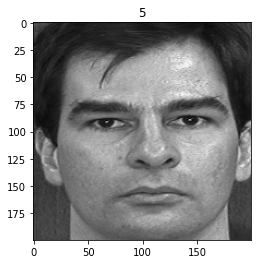

In [23]:
plt.imshow(dados_treinamento[0], cmap="gray")
plt.title(sujeito[0])


Text(0.5, 1.0, '1')

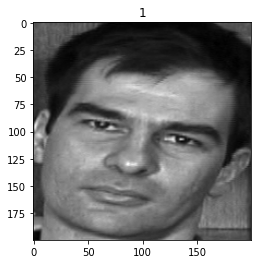

In [24]:
plt.imshow(dados_teste[0], cmap="gray")
plt.title(sujeitos_teste[0])


In [25]:
sujeitos = np.array(sujeitos, dtype=np.int32)
sujeitos_teste = np.array(sujeitos_teste, dtype=np.int32)

In [26]:
modelo_eingenfaces = cv.face.EigenFaceRecognizer_create()


In [27]:
modelo_eingenfaces.train(dados_treinamento, sujeitos)

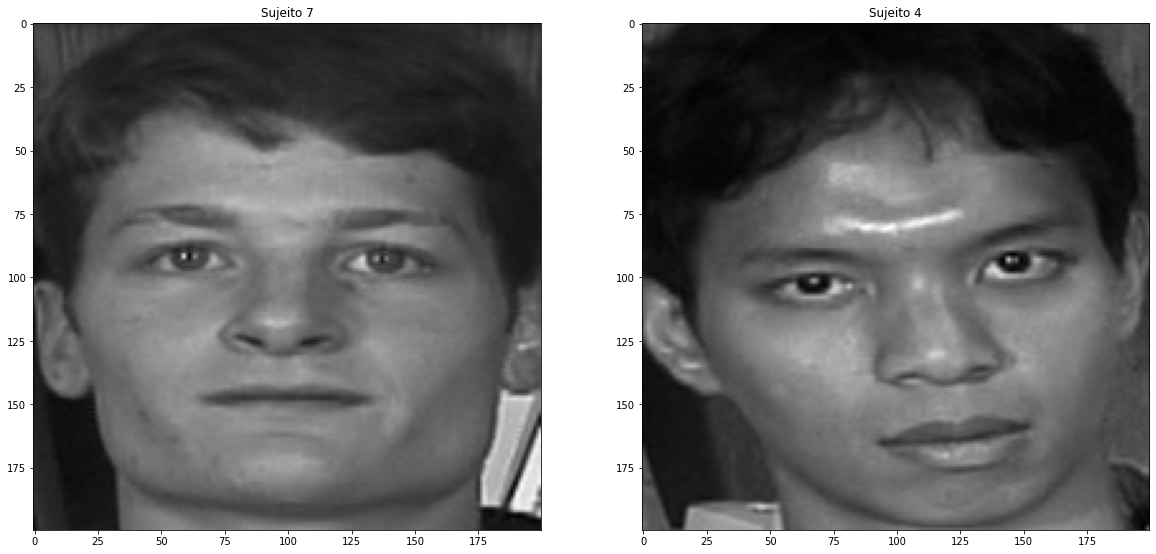

In [28]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.title("Sujeito {}".format(sujeitos_teste[34]))
plt.imshow(dados_teste[34], cmap="gray")

plt.subplot(122)
plt.title("Sujeito {}".format(sujeitos_teste[15]))
plt.imshow(dados_teste[15], cmap="gray")


In [29]:
predicao = modelo_eingenfaces.predict(dados_teste[34])
predicao

(7, 3946.3330299585236)

In [30]:
predicao = modelo_eingenfaces.predict(dados_teste[15])
predicao

(4, 4219.019354243286)

In [31]:
modelo_fisherfaces = cv.face.FisherFaceRecognizer_create()
modelo_fisherfaces.train(dados_treinamento, sujeitos)

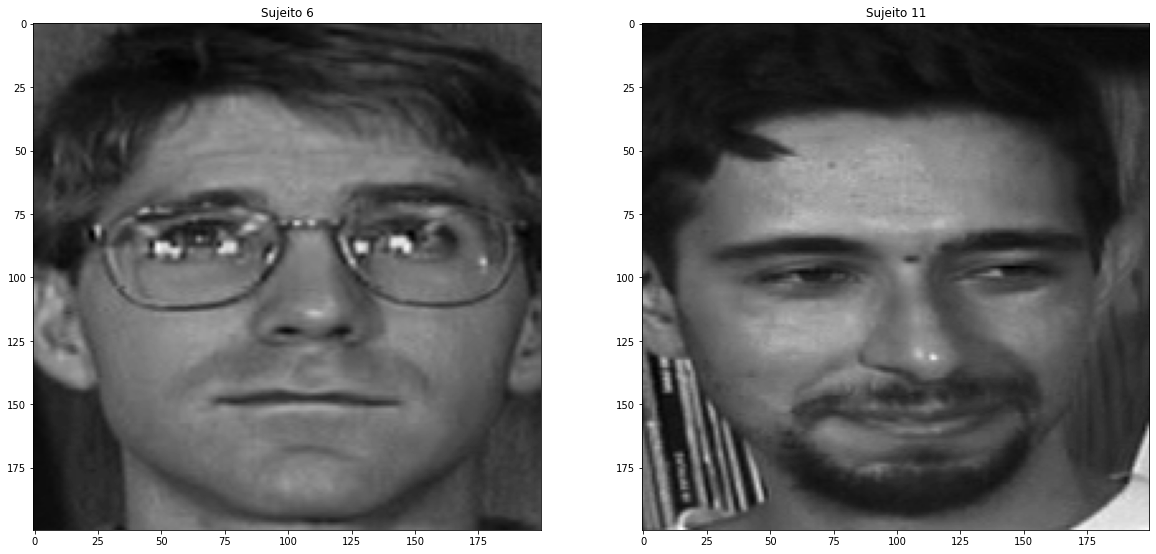

In [37]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Sujeito {}".format(sujeitos_teste[27]))
plt.imshow(dados_teste[27], cmap="gray")

plt.subplot(122)
plt.title("Sujeito {}".format(sujeitos_teste[54]))
plt.imshow(dados_teste[54], cmap="gray")


In [38]:
predicao = modelo_fisherfaces.predict(dados_teste[27])
predicao

(32, 893.9875428779818)

In [39]:
predicao = modelo_fisherfaces.predict(dados_teste[54])
predicao


(32, 923.0608149010035)

In [40]:
modelo_lbph = cv.face.LBPHFaceRecognizer_create()
modelo_lbph.train(dados_treinamento, sujeitos)

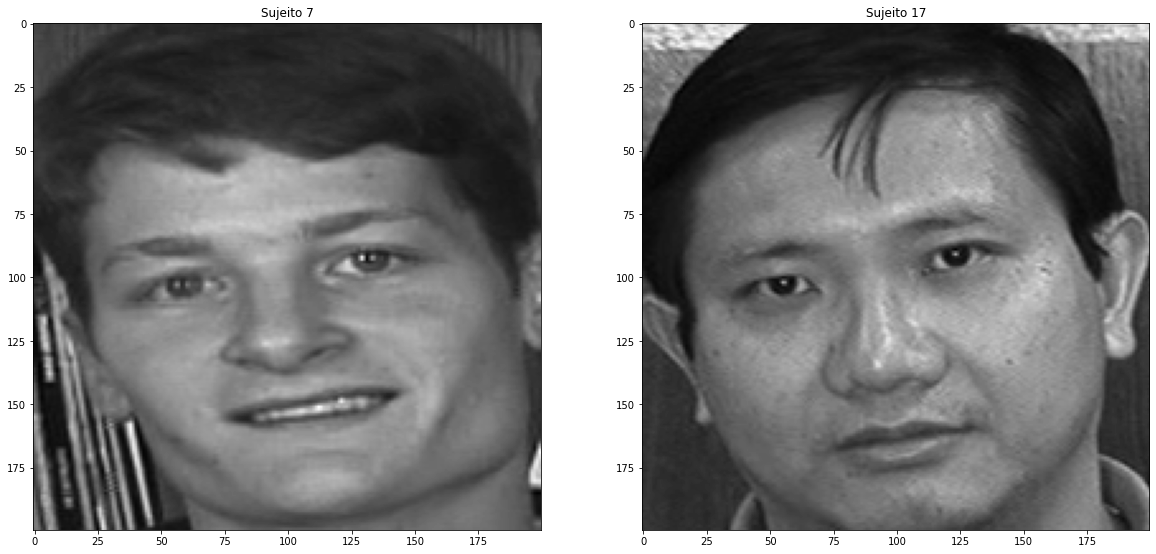

In [44]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
plt.title("Sujeito {}".format(sujeitos_teste[32]))
plt.imshow(dados_teste[32], cmap="gray")

plt.subplot(122)
plt.title("Sujeito {}".format(sujeitos_teste[82]))
plt.imshow(dados_teste[82], cmap="gray")


In [45]:
predicao = modelo_lbph.predict(dados_teste[32])
predicao


(7, 41.34239439502556)

In [46]:
predicao = modelo_lbph.predict(dados_teste[82])
predicao


(17, 39.587966022166185)